In [1]:
import spacy
import nltk
import os

In [2]:
data = {}
documents = []

for folder in os.listdir('data'):
    for file in os.listdir('data/' + folder):
        with open('data/' + folder + '/' + file, 'r', encoding="utf-8") as f:
            data[file] = f.read()

In [3]:
import contractions
import re
import spacy
import nltk

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# don't remove stopwords that could impact the model
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     --------------------------------------- 12.8/12.8 MB 14.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocess(text):
    text = text.lower()
    text = re.sub('(<[\w\s]*/?>)', "", text)
    text = contractions.fix(text)
    text = re.sub('[^a-zA-Z0-9\s]+', "", text)
    text = re.sub('\d+', "", text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.tag_ != 'PUNCT']
    text = ' '.join([token for token in tokens if token not in stopwords])
    text = re.sub('\s+', " ", text)
    return text

for key in data.keys():
    data[key] = preprocess(data[key])

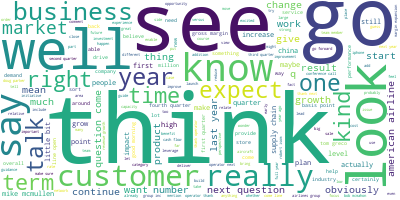

In [6]:
from wordcloud import WordCloud

long_string = ','.join(list(data.values()))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [13]:
import gensim.corpora as corpora

data_words = [doc.split() for doc in data.values()]
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 179), (1, 2), (2, 1), (3, 3), (4, 5), (5, 1), (6, 10), (7, 3), (8, 9), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 5), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 14), (21, 6), (22, 1), (23, 4), (24, 1), (25, 1), (26, 20), (27, 6), (28, 1), (29, 5)]


In [14]:
from pprint import pprint
import gensim
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"I" + 0.011*"year" + 0.010*"quarter" + 0.010*"not" + 0.010*"go" + '
  '0.007*"see" + 0.007*"think" + 0.007*"thank" + 0.007*"customer" + '
  '0.006*"get"'),
 (1,
  '0.018*"I" + 0.013*"quarter" + 0.012*"not" + 0.011*"think" + 0.009*"go" + '
  '0.008*"year" + 0.008*"see" + 0.008*"thank" + 0.007*"customer" + '
  '0.007*"question"'),
 (2,
  '0.018*"I" + 0.013*"quarter" + 0.010*"not" + 0.009*"think" + 0.009*"see" + '
  '0.008*"go" + 0.008*"year" + 0.008*"thank" + 0.006*"question" + '
  '0.006*"well"'),
 (3,
  '0.019*"I" + 0.010*"quarter" + 0.010*"year" + 0.009*"think" + 0.009*"see" + '
  '0.009*"not" + 0.007*"go" + 0.007*"question" + 0.007*"thank" + 0.006*"get"'),
 (4,
  '0.025*"I" + 0.011*"go" + 0.011*"quarter" + 0.010*"year" + 0.009*"see" + '
  '0.008*"not" + 0.008*"think" + 0.007*"thank" + 0.007*"question" + '
  '0.007*"growth"'),
 (5,
  '0.024*"I" + 0.012*"quarter" + 0.011*"not" + 0.009*"go" + 0.008*"thank" + '
  '0.008*"year" + 0.008*"think" + 0.007*"see" + 0.007*"growth" 

In [16]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

e:\Ebay_K\Top2Vec\venv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.004571  0.000081       1        1  27.822004
4      0.003203 -0.000208       2        1  22.433063
6      0.001740  0.005891       3        1  19.375327
1     -0.000289  0.001259       4        1   7.204573
7     -0.004558 -0.000346       5        1   6.085902
9      0.002419 -0.003016       6        1   5.860332
8      0.003868 -0.000158       7        1   3.989401
0     -0.002105  0.000367       8        1   3.364166
5      0.000421 -0.004091       9        1   2.770614
3     -0.000129  0.000224      10        1   1.094618, topic_info=         Term          Freq         Total Category  logprob  loglift
0           I  10391.000000  10391.000000  Default  30.0000  30.0000
950   quarter   5259.000000   5259.000000  Default  29.0000  29.0000
1295     year   4942.000000   4942.000000  Default  28.0000  28.0000
789       not   4548.000000   4548.000000  Default  27.0000  27.0000
1192    think   4384.000000   4384.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
132   billion     19.858092   1763.001083  Topic10  -5.5931   0.0286
1291    would     22.525940   2459.326301  Topic10  -5.4671  -0.1782
1272     well     21.814800   2670.677706  Topic10  -5.4991  -0.2927
53       also     19.640440   2042.634847  Topic10  -5.6041  -0.1296
1019  revenue     19.876003   2411.600317  Topic10  -5.5922  -0.2838

[942 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.233547       I
0         2  0.261934       I
0         3  0.180043       I
0         4  0.061201       I
0         5  0.071017       I
...     ...       ...     ...
7639      3  0.369361  zaheed
7639      4  0.092340  zaheed
7639      5  0.092340  zaheed
7639      6  0.092340  zaheed
7639      7  0.092340  zaheed

[3603 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 7, 2, 8, 10, 9, 1, 6, 4])